# Apparent temperature Prediction using Weather variables

Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

Statistics and Machine Learning can help us answer these questions and predict various relations and variables given the data.
Apparent temperature is the temperature that it feels like to our body because of other weather variables other than temperature.This is generally higher incase of high humidity.
In this project we try to predict the apparent temperature given other weather variables in an hourly manner.
Prerequisites:
We would highly recommend that before the hack night you have some kind of toolchain and development environment already installed and ready. If you have no idea where to start with this, try a combination like:
- Python
- scikit-learn / sklearn
- Pandas
- NumPy
- matplotlib

An environment to work in - something like Jupyter or Spyder
For Linux people, your package manager should be able to handle all of this. If it somehow can't, see if you can at least install Python and pip and then use pip to install the above packages.

Objectives in this project:
- Clean the data and drop useless columns.
- Make an EDA report .
- Visualize the distributions of various features and correlations between them.
- Feature engineering to extract the correct features for the model.
- Train a regression model to predict the apparent temperature 

Dataset:
The dataset is in the form of a csv file and the link to download is given below:
Link:
https://drive.google.com/file/d/15JFnZhmpuBYSaK4JcoLL709g1LAfB0b6/view?usp=sharing

Dataset description:
The data set contains 6000 entries with 12 columns listing various environment variables and text descriptions
The csv file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2008
Data available in the hourly response:
- time
- summary
- precipType
- temperature
- apparentTemperature
- humidity
- windSpeed
- windBearing
- visibility
- loudCover
- pressure


WorkFlow:
The workflow for the project is described in  steps given below:
- Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.
- Make an Exploratory Data Analysis on the data using pandas.
- Visualize distributions and correlation of features using seaborn and pandas
- Build a regression model taking the selected features and don’t forget to tune the hyperparameters to prevent overfitting
- Predict the apparent temp for the split test data(Use 30% of the data for test) 
- Experiment with all the algorithms and tune the hyperparameters to get the best results




In [1]:
import numpy as np
import pandas as pd
import os
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import hvplot.pandas

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data=pd.read_csv("C:\\Users\\Sai Sidharth\\Downloads\\weather_data.csv")

In [4]:
data.shape

(5999, 12)

In [5]:
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222                  7.388889      0.89            14.1197                     251          15.8263           0               1015.13  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556                  7.227778      0.86            14.2646                     259          15.8263           0               1015.63  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778                  9.377778      0.89             3.9284                     204          14.9569           0               1015.94  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889                  5.944444      0.83            14.1036                     269          15.8263           0               1016.41  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556                  6.977778      0.83            11.0446                     259          15.8263           0               1016.51  Partly cloudy throughout the day.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [7]:
data.size

71988

In [8]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [9]:
data.describe(include='all')

Formatted Date        Summary Precip Type  Temperature (C)  Apparent Temperature (C)     Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)                      Daily Summary
count                            5999           5999        5999      5999.000000               5999.000000  5999.000000        5999.000000             5999.000000      5999.000000      5999.0           5999.000000                               5999
unique                           5999             14           2              NaN                       NaN          NaN                NaN                     NaN              NaN         NaN                   NaN                                 58
top     2006-01-21 14:00:00.000 +0100  Partly Cloudy        rain              NaN                       NaN          NaN                NaN                     NaN              NaN         NaN                   NaN  Mostly cloudy throughout the day.
freq                                1           1791        4762              NaN                       NaN          NaN                NaN                     NaN              NaN         NaN                   NaN                                600
mean                              NaN            NaN         NaN        10.217695                  8.958658     0.779488          10.007362              190.349558         9.476875         0.0            997.359828                                NaN
std                               NaN            NaN         NaN        10.565425                 11.923712     0.173051           6.536619              107.026792         4.038583         0.0            145.173638                                NaN
min                               NaN            NaN         NaN       -14.088889                -22.094444     0.270000           0.000000                0.000000         0.000000         0.0              0.000000                                NaN
25%                               NaN            NaN         NaN         1.094444                 -1.538889     0.680000           4.878300              122.000000         6.906900         0.0           1012.060000                                NaN
50%                               NaN            NaN         NaN        10.050000                 10.050000     0.830000           9.064300              190.000000         9.982000         0.0           1016.840000                                NaN
75%                               NaN            NaN         NaN        18.722222                 18.722222     0.920000          13.395200              287.000000        11.270000         0.0           1022.490000                                NaN
max                               NaN            NaN         NaN        34.005556                 36.400000     1.000000          45.933300              359.000000        16.100000         0.0           1045.140000                                NaN

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [11]:
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [12]:
data.head(1)

Formatted Date  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)
0  2006-04-01 00:00:00.000 +0200         9.472222                  7.388889      0.89            14.1197               1015.13

In [13]:
data['Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

In [14]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

Formatted Date  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)                      Date  year  month  day  hour
0  2006-04-01 00:00:00.000 +0200         9.472222                  7.388889      0.89            14.1197               1015.13 2006-03-31 22:00:00+00:00  2006      3   31    22
1  2006-04-01 01:00:00.000 +0200         9.355556                  7.227778      0.86            14.2646               1015.63 2006-03-31 23:00:00+00:00  2006      3   31    23
2  2006-04-01 02:00:00.000 +0200         9.377778                  9.377778      0.89             3.9284               1015.94 2006-04-01 00:00:00+00:00  2006      4    1     0
3  2006-04-01 03:00:00.000 +0200         8.288889                  5.944444      0.83            14.1036               1016.41 2006-04-01 01:00:00+00:00  2006      4    1     1
4  2006-04-01 04:00:00.000 +0200         8.755556                  6.977778      0.83            11.0446               1016.51 2006-04-01 02:00:00+00:00  2006      4    1     2

## Exploratory Data Analysis

<AxesSubplot:xlabel='Date'>

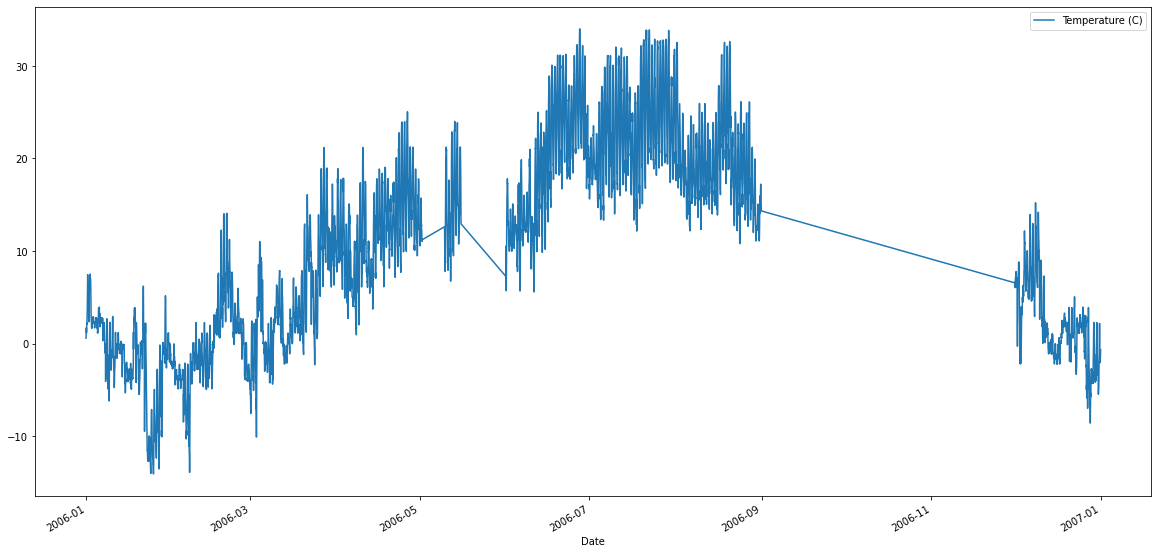

In [15]:
data.plot(y="Temperature (C)",x='Date', figsize=(20,10))

In [16]:
jan2006=data[data.month==1]
jan2006

Formatted Date  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)                      Date  year  month  day  hour
2208  2006-02-01 00:00:00.000 +0100        -2.144444                 -6.200000      0.86            11.2700               1025.18 2006-01-31 23:00:00+00:00  2006      1   31    23
2881  2006-01-01 01:00:00.000 +0100         1.161111                 -3.238889      0.85            16.6152               1016.15 2006-01-01 00:00:00+00:00  2006      1    1     0
2882  2006-01-01 02:00:00.000 +0100         1.666667                 -3.155556      0.82            20.2538               1015.87 2006-01-01 01:00:00+00:00  2006      1    1     1
2883  2006-01-01 03:00:00.000 +0100         1.711111                 -2.194444      0.82            14.4900               1015.56 2006-01-01 02:00:00+00:00  2006      1    1     2
2884  2006-01-01 04:00:00.000 +0100         1.183333                 -2.744444      0.86            13.9426               1014.98 2006-01-01 03:00:00+00:00  2006      1    1     3
...                             ...              ...                       ...       ...                ...                   ...                       ...   ...    ...  ...   ...
3619  2006-01-09 19:00:00.000 +0100        -1.222222                 -3.905556      0.87             7.2611               1033.81 2006-01-09 18:00:00+00:00  2006      1    9    18
3620  2006-01-09 20:00:00.000 +0100        -1.222222                 -1.222222      0.88             0.1288               1033.58 2006-01-09 19:00:00+00:00  2006      1    9    19
3621  2006-01-09 21:00:00.000 +0100        -0.688889                 -0.688889      0.84             3.3166               1033.47 2006-01-09 20:00:00+00:00  2006      1    9    20
3622  2006-01-09 22:00:00.000 +0100        -1.111111                 -1.111111      0.83             4.7817               1033.64 2006-01-09 21:00:00+00:00  2006      1    9    21
3623  2006-01-09 23:00:00.000 +0100        -1.277778                 -3.444444      0.82             5.9248               1033.55 2006-01-09 22:00:00+00:00  2006      1    9    22

[744 rows x 11 columns]

<AxesSubplot:xlabel='Date'>

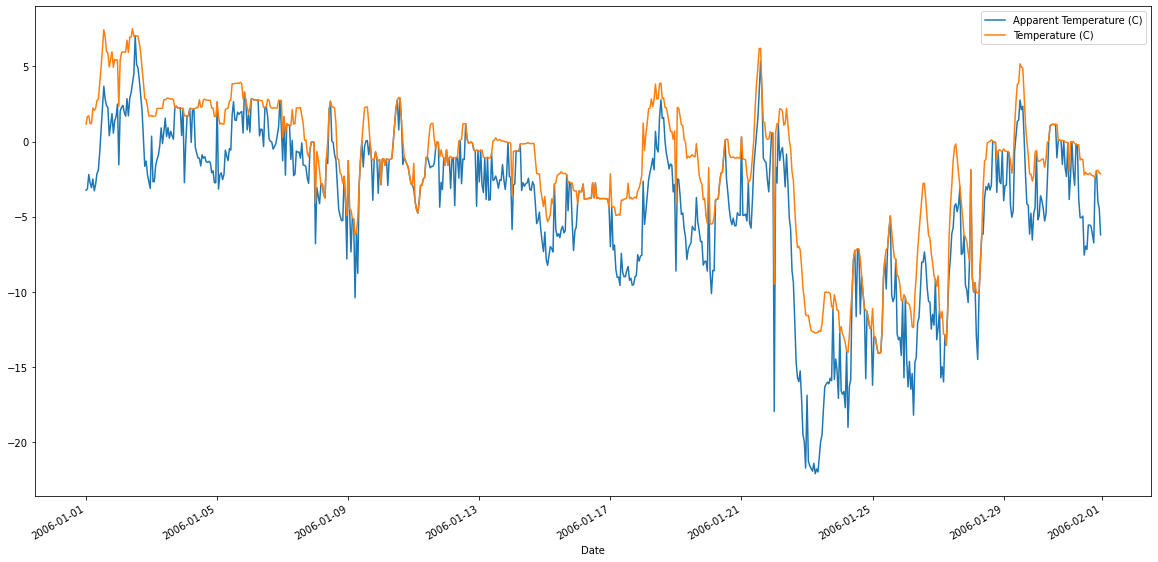

In [17]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],x='Date',kind='line',figsize=(20,10))

In [18]:
jan2006=data[data.month==1]
jan2006

Formatted Date  Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)                      Date  year  month  day  hour
2208  2006-02-01 00:00:00.000 +0100        -2.144444                 -6.200000      0.86            11.2700               1025.18 2006-01-31 23:00:00+00:00  2006      1   31    23
2881  2006-01-01 01:00:00.000 +0100         1.161111                 -3.238889      0.85            16.6152               1016.15 2006-01-01 00:00:00+00:00  2006      1    1     0
2882  2006-01-01 02:00:00.000 +0100         1.666667                 -3.155556      0.82            20.2538               1015.87 2006-01-01 01:00:00+00:00  2006      1    1     1
2883  2006-01-01 03:00:00.000 +0100         1.711111                 -2.194444      0.82            14.4900               1015.56 2006-01-01 02:00:00+00:00  2006      1    1     2
2884  2006-01-01 04:00:00.000 +0100         1.183333                 -2.744444      0.86            13.9426               1014.98 2006-01-01 03:00:00+00:00  2006      1    1     3
...                             ...              ...                       ...       ...                ...                   ...                       ...   ...    ...  ...   ...
3619  2006-01-09 19:00:00.000 +0100        -1.222222                 -3.905556      0.87             7.2611               1033.81 2006-01-09 18:00:00+00:00  2006      1    9    18
3620  2006-01-09 20:00:00.000 +0100        -1.222222                 -1.222222      0.88             0.1288               1033.58 2006-01-09 19:00:00+00:00  2006      1    9    19
3621  2006-01-09 21:00:00.000 +0100        -0.688889                 -0.688889      0.84             3.3166               1033.47 2006-01-09 20:00:00+00:00  2006      1    9    20
3622  2006-01-09 22:00:00.000 +0100        -1.111111                 -1.111111      0.83             4.7817               1033.64 2006-01-09 21:00:00+00:00  2006      1    9    21
3623  2006-01-09 23:00:00.000 +0100        -1.277778                 -3.444444      0.82             5.9248               1033.55 2006-01-09 22:00:00+00:00  2006      1    9    22

[744 rows x 11 columns]

In [19]:
data['month'].value_counts()

7     744
3     744
1     744
12    744
8     742
6     720
4     720
2     672
5     168
11      1
Name: month, dtype: int64

In [20]:
winter=data[(data.month==11) | (data.month==12) | (data.month==1) | (data.month==2)]
winter.shape

(2161, 11)

In [21]:
spring=data[(data.month==3)| (data.month==4)| (data.month==5)]
spring.shape

(1632, 11)

In [22]:
summer=data[(data.month==6)| (data.month==7)| (data.month==8)]
summer.shape

(2206, 11)

<AxesSubplot:xlabel='Date'>

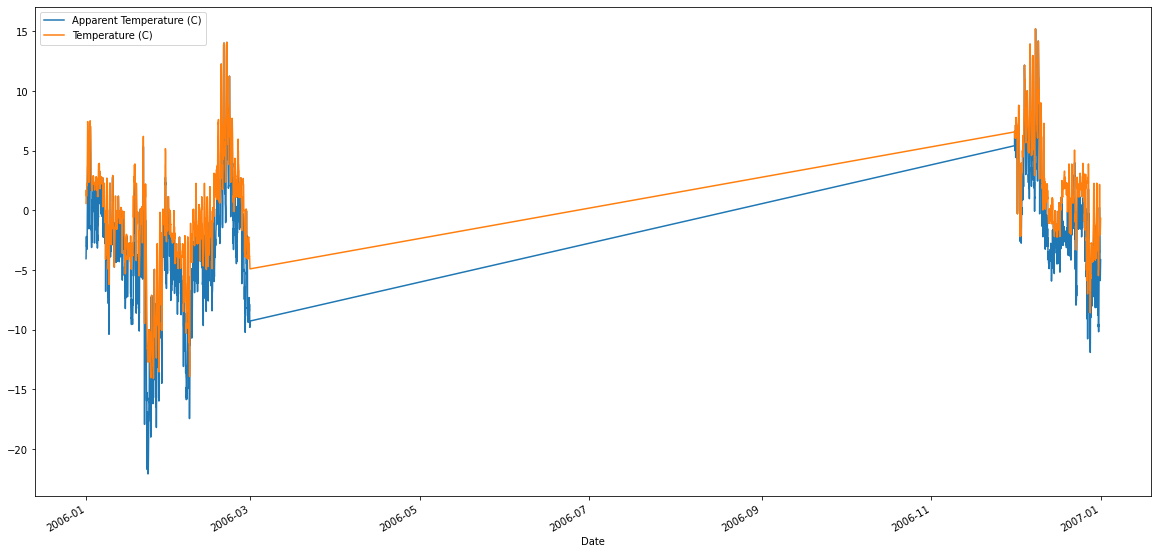

In [23]:
winter.plot(y=['Apparent Temperature (C)','Temperature (C)'],x='Date',kind='line',figsize=(20,10))

<AxesSubplot:xlabel='Date'>

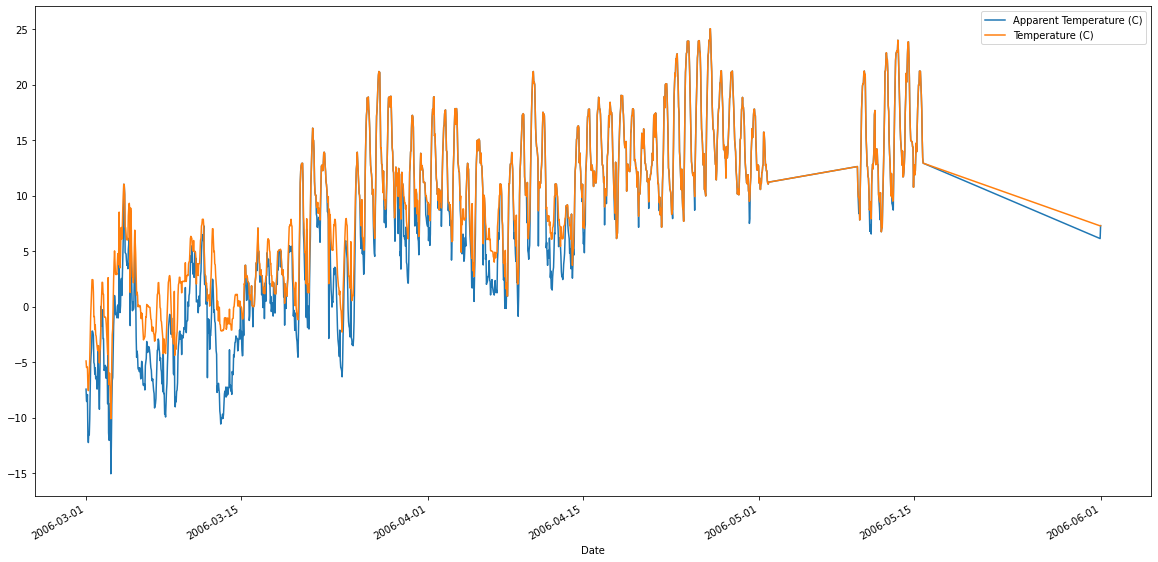

In [24]:
spring.plot(y=['Apparent Temperature (C)','Temperature (C)'],x='Date',kind='line',figsize=(20,10))

<AxesSubplot:xlabel='Date'>

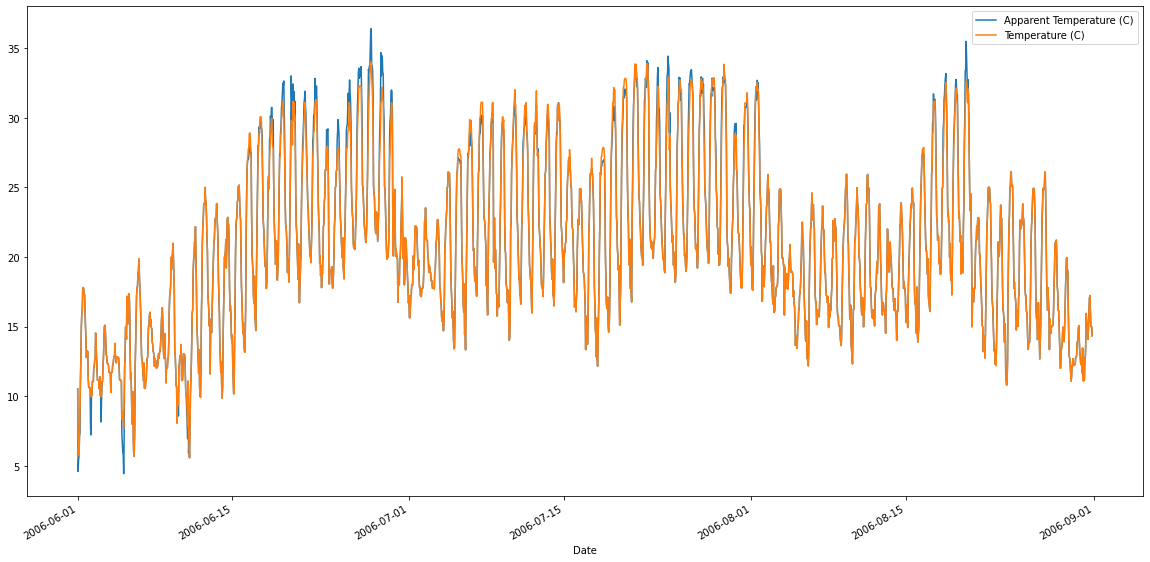

In [25]:
summer.plot(y=['Apparent Temperature (C)','Temperature (C)'],x='Date',kind='line',figsize=(20,10))

### Pariwise Correlation Analysis

In [26]:
list(data.columns)

['Formatted Date',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Pressure (millibars)',
 'Date',
 'year',
 'month',
 'day',
 'hour']

In [27]:
dataforcorr=data[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]

In [28]:
dataforcorr.corr()

Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)
Temperature (C)                  1.000000                  0.992881 -0.564260          -0.053935             -0.080315
Apparent Temperature (C)         0.992881                  1.000000 -0.535399          -0.126701             -0.077491
Humidity                        -0.564260                 -0.535399  1.000000          -0.209529              0.061836
Wind Speed (km/h)               -0.053935                 -0.126701 -0.209529           1.000000             -0.043172
Pressure (millibars)            -0.080315                 -0.077491  0.061836          -0.043172              1.000000

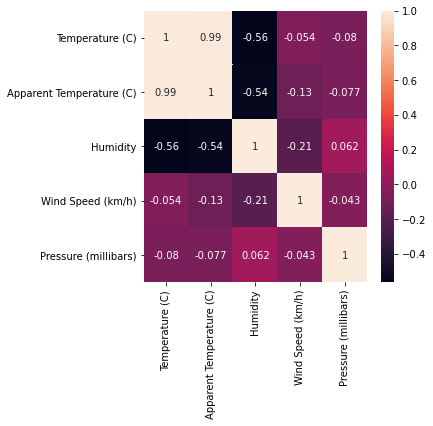

In [29]:
plt.figure(figsize =(5,5))
sns.heatmap(dataforcorr.corr(),annot=True)
plt.show()

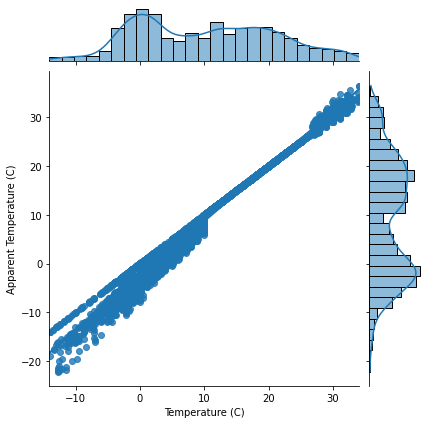

In [30]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

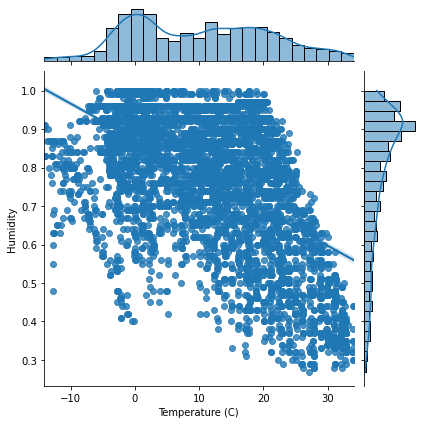

In [31]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

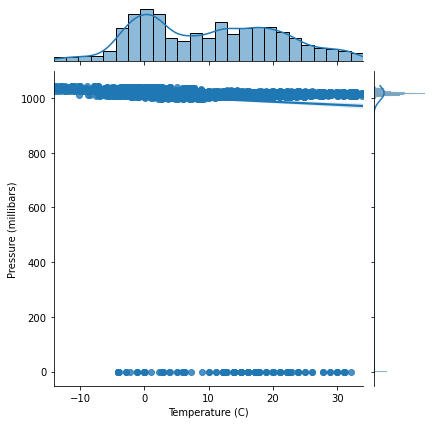

In [32]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

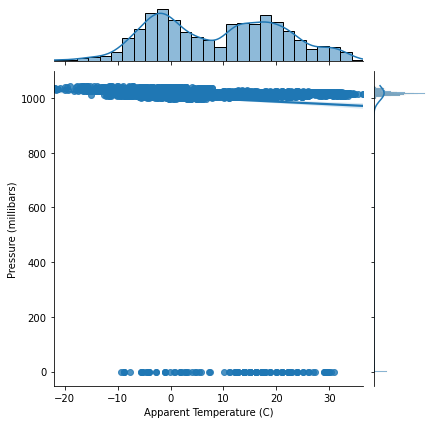

In [33]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

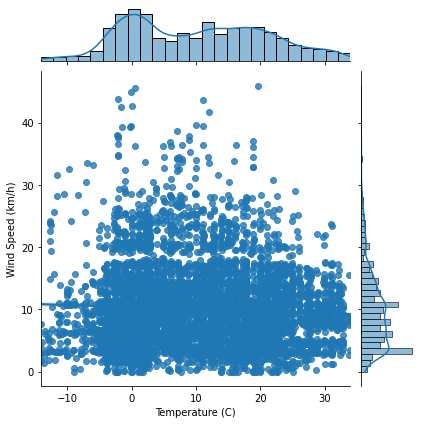

In [34]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

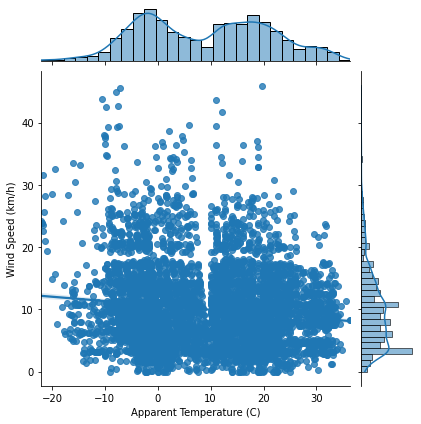

In [35]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

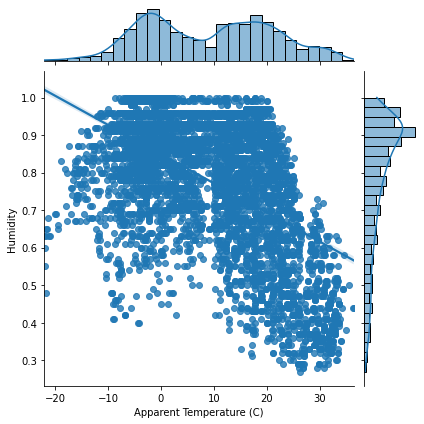

In [36]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

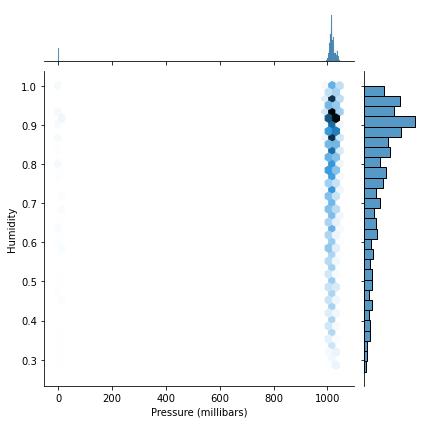

In [37]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

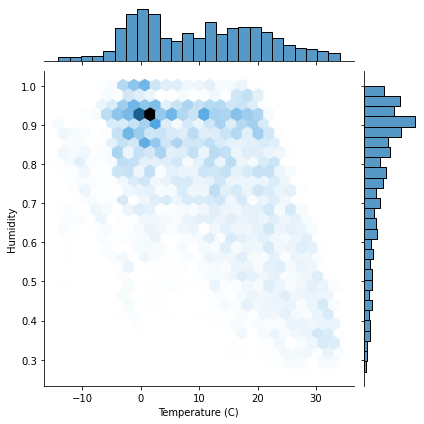

In [38]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

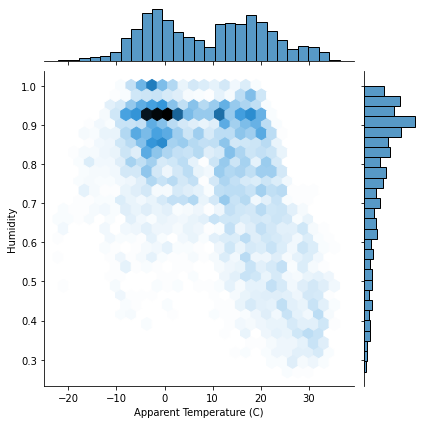

In [39]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 2160x1440 with 0 Axes>

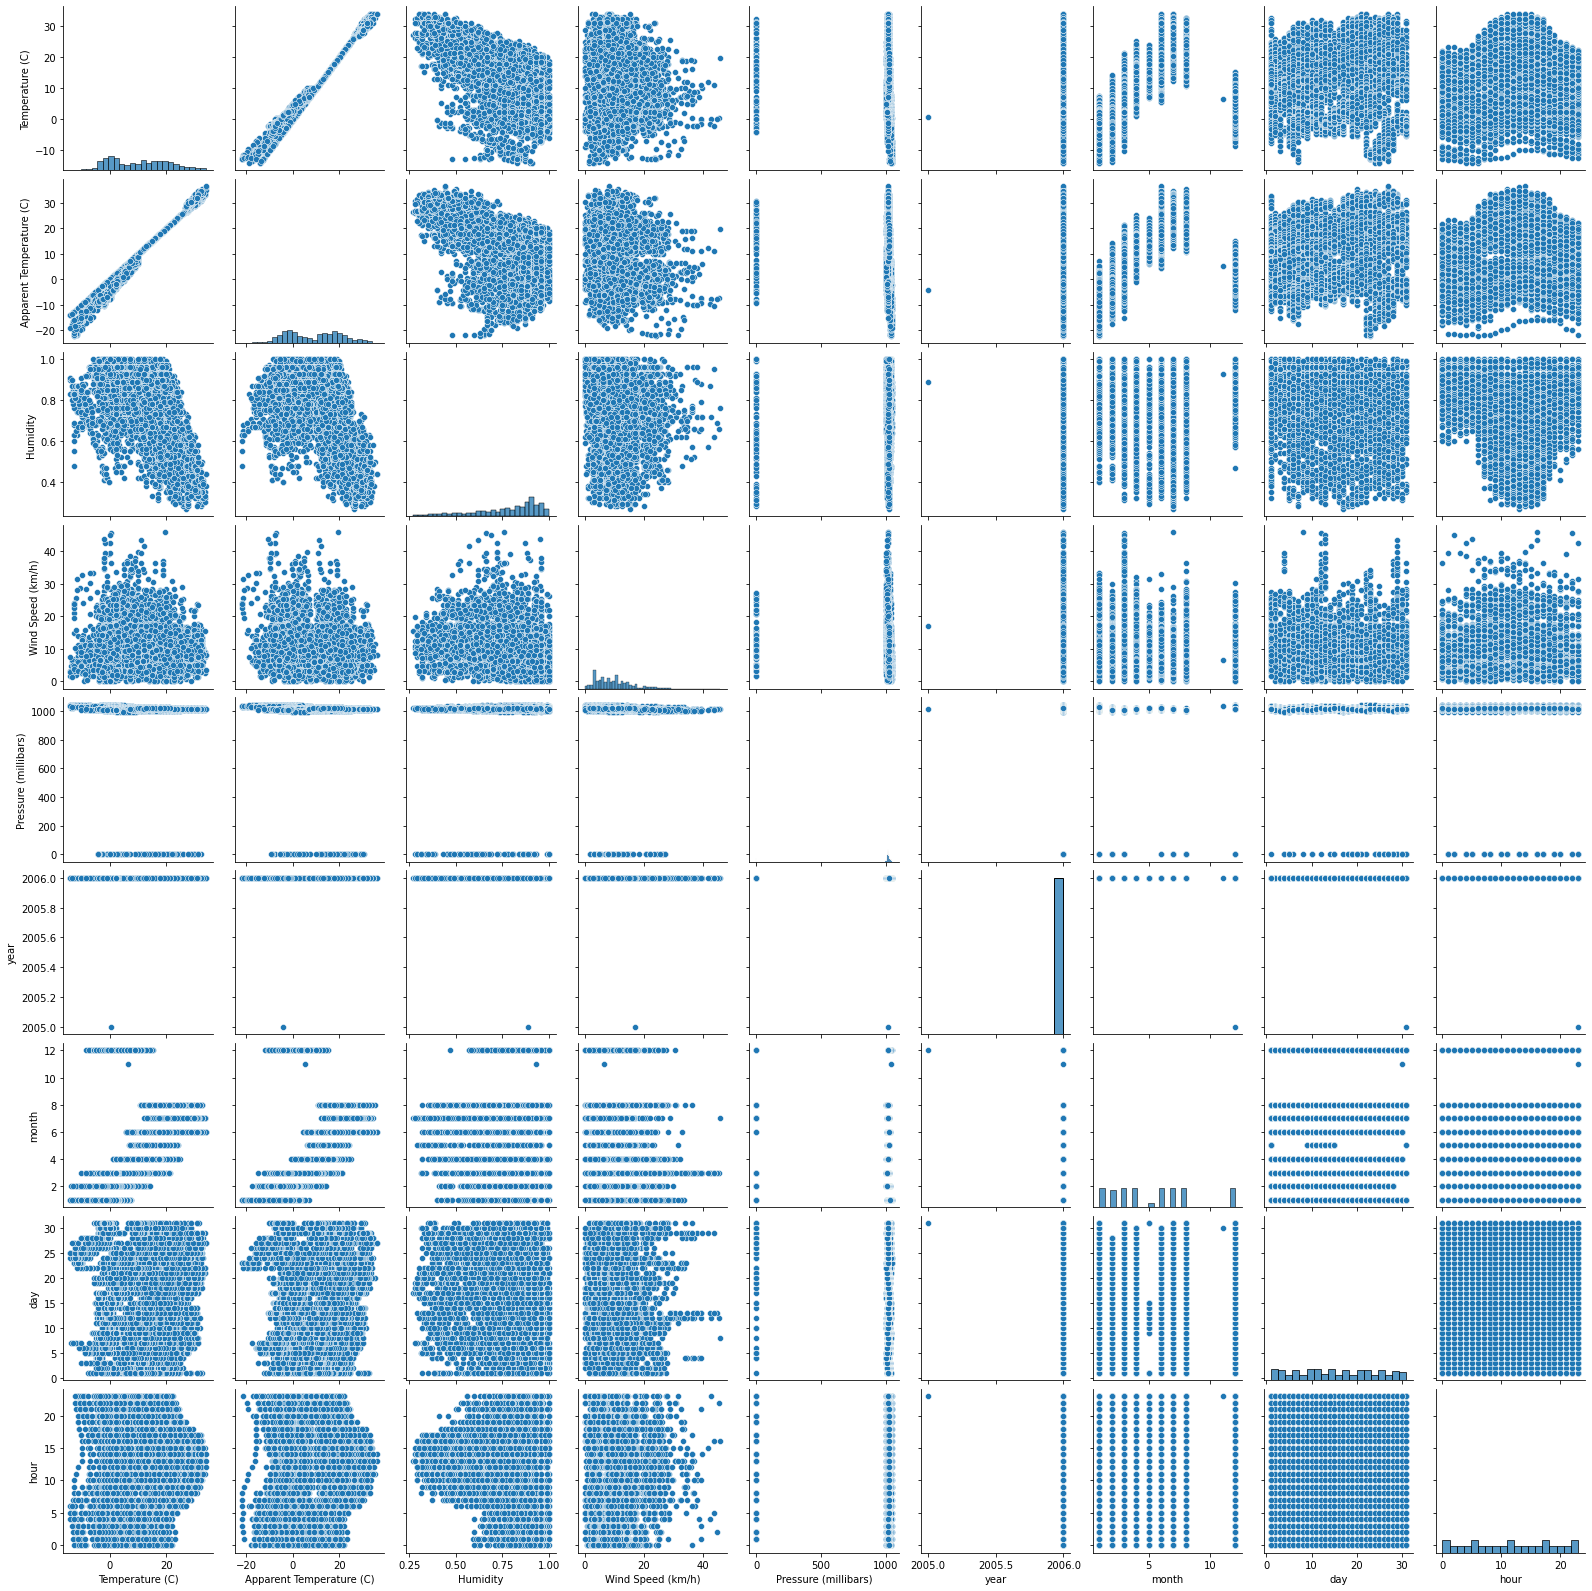

In [40]:
plt.figure(figsize =(30,20))
sns.pairplot(data)
plt.show()

In [41]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Train Test Split

In [42]:
X=data[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
Y= data['Apparent Temperature (C)']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
lin_reg=linear_model.LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [46]:
print(lin_reg.intercept_)

-1.721055681126856


In [47]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Temperature (C)          1.122317
Humidity                 0.707629
Wind Speed (km/h)       -0.128689
Pressure (millibars)    -0.000054

In [48]:
pred=lin_reg.predict(X_test)

In [49]:
pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

In [50]:
lin_reg.score(X_test,Y_test)

0.991680288472796

In [51]:
pd.DataFrame({'Error Values': (Y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

In [52]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':pred})
df

Actual  Predicted
84     5.161111   4.918989
2409   1.288889   2.190283
4997   6.077778   5.215293
346   14.144444  14.093481
79     1.633333   2.090607
...         ...        ...
841   16.161111  16.238596
2570  -2.255556  -1.378077
1189  24.861111  25.090679
175   11.133333   9.271084
2232  -5.338889  -5.032190

[1800 rows x 2 columns]

In [53]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8486918268738025
MSE: 1.1543232293345727
RMSE: 1.0743943546643255
R2 Square 0.991680288472796
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8969309647790368
MSE: 1.2794473371842154
RMSE: 1.1311265787630558
R2 Square 0.9910902567427455
__________________________________


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Linear Regression  0.848692  1.154323  1.074394    0.99168          0.966383

### Polynomial Regression - 2nd degree

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d=poly_reg.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,Y_train)

LinearRegression(normalize=True)

In [58]:
test_pred=lin_reg.predict(X_test_2_d)
train_pred=lin_reg.predict(X_train_2_d)

In [59]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.48467428289765324
MSE: 0.40832856497406206
RMSE: 0.6390059193576082
R2 Square 0.9970569977432927
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4885381792684528
MSE: 0.4102495897335926
RMSE: 0.6405072909293013
R2 Square 0.9971431270286086
__________________________________


In [60]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression Second Degree", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0                    Linear Regression  0.848692  1.154323  1.074394   0.991680          0.966383
1  Polynomial Regression Second Degree  0.484674  0.408329  0.639006   0.997057          0.000000

### Polynomial Regression - 3rd degree

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=3)

X_train_3_d = poly_reg.fit_transform(X_train)
X_test_3_d=poly_reg.transform(X_test)

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train_3_d,Y_train)

test_pred=lin_reg.predict(X_test_3_d)
train_pred=lin_reg.predict(X_train_3_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.39511595502785063
MSE: 0.2680838638634486
RMSE: 0.5177681564787937
R2 Square 0.9980678025393911
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.40085050420338825
MSE: 0.27881865641274517
RMSE: 0.5280328175527967
R2 Square 0.9980583783546438
__________________________________


In [62]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression Third Degree", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0                    Linear Regression  0.848692  1.154323  1.074394   0.991680          0.966383
1  Polynomial Regression Second Degree  0.484674  0.408329  0.639006   0.997057          0.000000
2   Polynomial Regression Third Degree  0.395116  0.268084  0.517768   0.998068          0.000000

### Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=2)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.13052314823638891
MSE: 0.07075658868671694
RMSE: 0.2660011065516776
R2 Square 0.9994900263708096
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05291074591617057
MSE: 0.02197306677818419
RMSE: 0.14823315006497093
R2 Square 0.9998469851959683
__________________________________


In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
model_tune=RandomForestRegressor

In [67]:
optimization_dict={'n_estimators':[10,20,30,50,75,100,150]}

In [68]:
model = GridSearchCV(rf_reg,optimization_dict,cv=5)

In [69]:
model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=2),
             param_grid={'n_estimators': [10, 20, 30, 50, 75, 100, 150]})

In [70]:
print(model.best_score_)

0.9997067445621622


In [71]:
print(model.best_params_)

{'n_estimators': 150}


### Random Forest Regressor - Optimal Parameters

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=150)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.06868458851608954
MSE: 0.0247417138917507
RMSE: 0.15729499004021297
R2 Square 0.999821675664981
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.02688072997526484
MSE: 0.004812164010416412
RMSE: 0.06936976294046573
R2 Square 0.999966489323477
__________________________________


In [73]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0                    Linear Regression  0.848692  1.154323  1.074394   0.991680          0.966383
1  Polynomial Regression Second Degree  0.484674  0.408329  0.639006   0.997057          0.000000
2   Polynomial Regression Third Degree  0.395116  0.268084  0.517768   0.998068          0.000000
3              Random Forest Regressor  0.068685  0.024742  0.157295   0.999822          0.000000

### Support Vector Machine Regression

In [74]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf',gamma='auto')
svm_reg.fit(X_train, Y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.802743816544466
MSE: 41.476760546143346
RMSE: 6.440245379342572
R2 Square 0.7010588767015015
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.407291927969257
MSE: 37.87138928760054
RMSE: 6.1539734552239125
R2 Square 0.7362733537039072
__________________________________


In [75]:
results_df_2 = pd.DataFrame(data=[["SVM Regression", *evaluate(Y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model       MAE        MSE      RMSE  R2 Square  Cross Validation
0                    Linear Regression  0.848692   1.154323  1.074394   0.991680          0.966383
1  Polynomial Regression Second Degree  0.484674   0.408329  0.639006   0.997057          0.000000
2   Polynomial Regression Third Degree  0.395116   0.268084  0.517768   0.998068          0.000000
3              Random Forest Regressor  0.068685   0.024742  0.157295   0.999822          0.000000
4                       SVM Regression  3.802744  41.476761  6.440245   0.701059          0.000000

In [76]:
results= results_df[['Model','MAE','MSE','RMSE','R2 Square']]

In [77]:
results

Model       MAE        MSE      RMSE  R2 Square
0                    Linear Regression  0.848692   1.154323  1.074394   0.991680
1  Polynomial Regression Second Degree  0.484674   0.408329  0.639006   0.997057
2   Polynomial Regression Third Degree  0.395116   0.268084  0.517768   0.998068
3              Random Forest Regressor  0.068685   0.024742  0.157295   0.999822
4                       SVM Regression  3.802744  41.476761  6.440245   0.701059